In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
data = pd.read_csv("Amazon_indeed_reviews.csv")

In [ ]:
data.head()

,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com


In [ ]:
data.shape

(600, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            600 non-null    int64 
 1   Reviewer_designation  600 non-null    object
 2   Job_Title             600 non-null    object
 3   Employee_Status       600 non-null    object
 4   City                  600 non-null    object
 5   State                 600 non-null    object
 6   Full_Location         600 non-null    object
 7   Date                  600 non-null    object
 8   Title                 600 non-null    object
 9   Comment               600 non-null    object
 10  Pros                  600 non-null    object
 11  Cons                  600 non-null    object
 12  User_Rating           600 non-null    int64 
 13  Company               600 non-null    object
dtypes: int64(2), object(12)
memory usage: 65.8+ KB


In [ ]:
from textblob import TextBlob

In [ ]:
data['Comment'] = data['Comment'].astype(str)

In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [ ]:
data['Polarity'] = data['Comment'].apply(pol)
data['Subjectivity'] = data['Comment'].apply(sub)

In [ ]:
data.head(20)

,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company,Polarity,Subjectivity
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com,0.356528,0.565000
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com,0.267857,0.517857
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com,-0.375000,0.500000
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com,0.237619,0.593878
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com,0.364394,0.575000
5,5,Delivery Service partner (Current Employee),Delivery Service partner,Current Employee,Bellmawr,NJ,"Bellmawr, NJ","December 20, 2021",Amazon Flex program was okay,I was part of the amazon flex program. Which a...,,,3,Amazon.com,0.033333,0.883333
6,6,FC Associatei (Former Employee),FC Associatei,Former Employee,Davenport,FL,"Davenport, FL","December 20, 2021",Never worked here before.,I have never worked for Amazon.com I have only...,,,4,Amazon.com,0.333333,0.600000
7,7,Package Handler (Current Employee),Package Handler,Current Employee,Carteret,NJ,"Carteret, NJ","December 20, 2021","Always busy, something to do",Modern slavery. It’s pretty basic too work her...,None at the moment,Short breaks,2,Amazon.com,0.183333,0.629167
8,8,Amazon Stow Associate (Current Employee),Amazon Stow Associate,Current Employee,Ottawa,ON,"Ottawa, ON","December 20, 2021",The environment of the work is good but the wo...,Yes I enjoy working in Amazon but the is high ...,I need to understand how I can improve my prod...,,3,Amazon.com,0.114167,0.444167
9,9,Software Engineer Intern (Former Employee),Software Engineer Intern,Former Employee,Bellevue,WA,"Bellevue, WA","December 19, 2021",Had a great internship experience at AWS,I was a software engineer intern. I was very l...,,,5,Amazon.com,0.295833,0.650000


In [ ]:
Good_Review = pd.DataFrame(data['User_Rating'] >= 3)

In [ ]:
data['Good_Review'] = Good_Review

In [ ]:
data.head()

,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company,Polarity,Subjectivity,Good_Review
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com,0.356528,0.565000,True
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com,0.267857,0.517857,False
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com,-0.375000,0.500000,False
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com,0.237619,0.593878,True
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com,0.364394,0.575000,True


In [ ]:
data['Good_Review'] = data['Good_Review'].astype(int)

In [ ]:
data.head()

,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company,Polarity,Subjectivity,Good_Review
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com,0.356528,0.565000,1
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com,0.267857,0.517857,0
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com,-0.375000,0.500000,0
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com,0.237619,0.593878,1
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com,0.364394,0.575000,1


In [ ]:
data['Good_Review'].value_counts()

1    418
0    182
Name: Good_Review, dtype: int64

In [ ]:
a = data.groupby(['Good_Review'])['Unnamed: 0'].count()

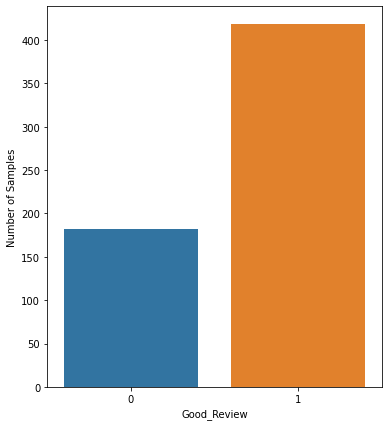

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

a = a.reset_index()
a = a.rename(columns={'Unnamed: 0': 'Number of Samples'})
fig, ax = plt.subplots(figsize=(6, 7))

sns.barplot(x = 'Good_Review', y = "Number of Samples", data = a)

In [ ]:
data

,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company,Polarity,Subjectivity,Good_Review
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com,0.356528,0.565000,1
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com,0.267857,0.517857,0
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com,-0.375000,0.500000,0
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com,0.237619,0.593878,1
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com,0.364394,0.575000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,FC Associate 1 (Former Employee),FC Associate 1,Former Employee,Coppell,TX,"Coppell, TX","November 24, 2021",Great,Loved it!. Extremely noisy which is why I had ...,,,4,Amazon.com,0.250000,0.637143,1
596,596,Package Handler (Former Employee),Package Handler,Former Employee,Charlotte,NC,"Charlotte, NC","November 24, 2021",hard work,very hard working envoirment to be in very str...,none,evrerything,1,Amazon.com,-0.161806,0.424306,0
597,597,Package Handler (Current Employee),Package Handler,Current Employee,Channahon,IL,"Channahon, IL","November 24, 2021",Great pay for the work,Some managers can be kind of incompetent and t...,Pay,mandatory overtime,3,Amazon.com,0.033333,0.404762,1
598,598,Fulfillment Associate (Former Employee),Fulfillment Associate,Former Employee,Brampton,ON,"Brampton, ON","November 24, 2021",Great benefits and career advancement opportun...,Amazon is a great place to work as the managem...,,,5,Amazon.com,0.360000,0.390000,1


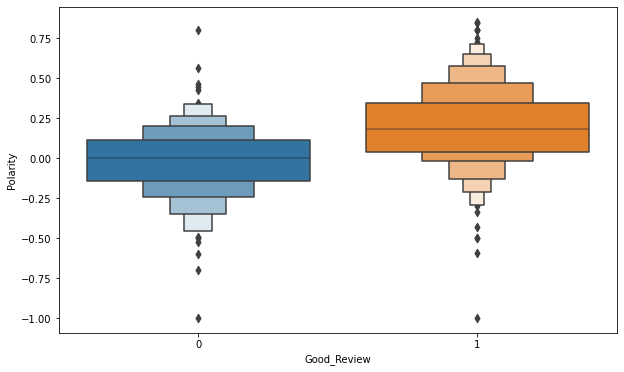

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x = 'Good_Review', y= 'Polarity', data = data)

In [ ]:
from wordcloud import WordCloud

In [ ]:
text = " ".join(i.split()[1] for i in data.Comment)

In [ ]:
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)

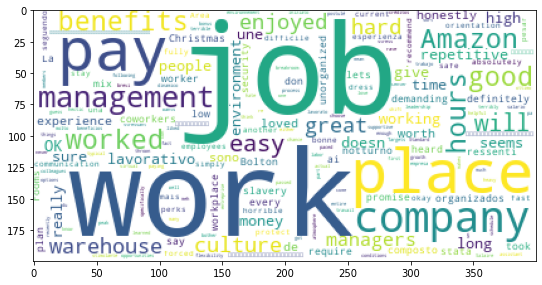

In [ ]:
plt.figure(figsize = (9, 7))
plt.imshow(word_cloud)

In [ ]:
pos = " ".join(i for i in data['Comment'][data['Good_Review'] == 1])

In [ ]:
word_cloud = WordCloud(collocations=False, background_color='white').generate(pos)

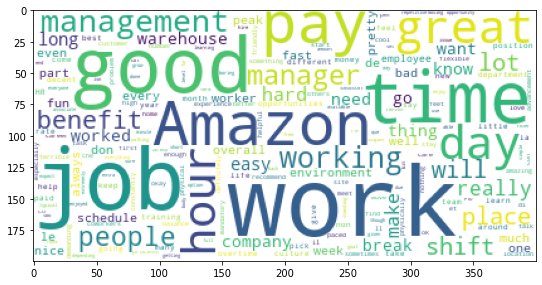

In [ ]:
plt.figure(figsize = (9, 7))
plt.imshow(word_cloud)

In [ ]:
neg = " ".join(i for i in data['Comment'][data['Good_Review'] == 0])

In [ ]:
word_cloud = WordCloud(collocations=False, background_color='white').generate(neg)

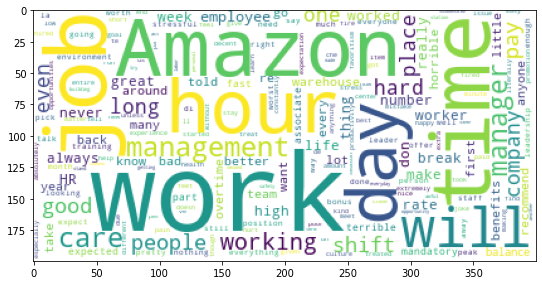

In [ ]:
plt.figure(figsize = (9, 7))
plt.imshow(word_cloud)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Reviewer_designation', 'Job_Title', 'Employee_Status',
       'City', 'State', 'Full_Location', 'Date', 'Title', 'Comment', 'Pros',
       'Cons', 'User_Rating', 'Company', 'Polarity', 'Subjectivity',
       'Good_Review'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0', 'Date', 'City', 'User_Rating', 'Reviewer_designation', 'Company', 'Polarity', 'Subjectivity'], axis = 1, inplace = True)

In [ ]:
data.head()

,Job_Title,Employee_Status,State,Full_Location,Title,Comment,Pros,Cons,Good_Review
0,HR Generalist,Former Employee,Greater London,"London, Greater London",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",1
1,Amazon Fulfillment Associate,Former Employee,IL,"Monee, IL",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",0
2,Learning Manager,Former Employee,AB,"Calgary, AB",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,0
3,Warehouse Associate,Former Employee,MO,"Hazelwood, MO",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",1
4,Driver,Current Employee,FL,"Jacksonville, FL",Cool,Cool coworkers enjoy driving the van. Workout ...,,,1


In [ ]:
data['Reviews'] = data['Job_Title']+' '+data['Employee_Status']+' '+data['Title']+' '+data['Comment']+' '+data['Pros']+' '+data['Cons']

del data['Employee_Status']
del data['Job_Title']
del data['State']
del data['Full_Location']
del data['Title']
del data['Comment']
del data['Pros']
del data['Cons']

In [ ]:
data.head()

,Good_Review,Reviews
0,1,HR Generalist Former Employee Good place for ...
1,0,Amazon Fulfillment Associate Former Employee ...
2,0,Learning Manager Former Employee this company...
3,1,Warehouse Associate Former Employee Very fast...
4,1,Driver Current Employee Cool Cool coworkers e...


In [ ]:
data.rename(columns={'Good_Review': 'Labels'}, inplace=True)

In [ ]:
nltk.download("stopwords")

from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
data['Reviews'] = data['Reviews'].apply(lambda x:x.lower())

In [ ]:
data['Reviews'] = data['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
data.head()

,Labels,Reviews
0,1,hr generalist former employee good place progr...
1,0,amazon fulfillment associate former employee t...
2,0,learning manager former employee company care ...
3,1,warehouse associate former employee fast paced...
4,1,driver current employee cool cool coworkers en...


In [ ]:
X = data.Reviews
y = data.Labels

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25)

In [ ]:
vect = CountVectorizer()

In [ ]:
vect.fit(X_train)

CountVectorizer()

In [ ]:
X_train_v = vect.transform(X_train)

In [ ]:
X_train_v

<450x3944 sparse matrix of type '<class 'numpy.int64'>'
	with 16393 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_v = vect.transform(X_test)
X_test_v

<150x3944 sparse matrix of type '<class 'numpy.int64'>'
	with 4498 stored elements in Compressed Sparse Row format>

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_v, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test_v)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.6466666666666666


In [ ]:
tf_vect = TfidfVectorizer()

In [ ]:
tf_vect.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train_tf = tf_vect.transform(X_train)

In [ ]:
X_train_tf

<450x3944 sparse matrix of type '<class 'numpy.float64'>'
	with 16393 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tf = tf_vect.transform(X_test)
X_test_tf

<150x3944 sparse matrix of type '<class 'numpy.float64'>'
	with 4498 stored elements in Compressed Sparse Row format>

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_tf, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test_tf)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.6666666666666666


In [ ]:
print("Classification Report: ", classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.37      0.32      0.34        41
           1       0.76      0.80      0.78       109

    accuracy                           0.67       150
   macro avg       0.56      0.56      0.56       150
weighted avg       0.65      0.67      0.66       150



In [ ]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[13 28]
 [22 87]]


Text(69.0, 0.5, 'Actual')

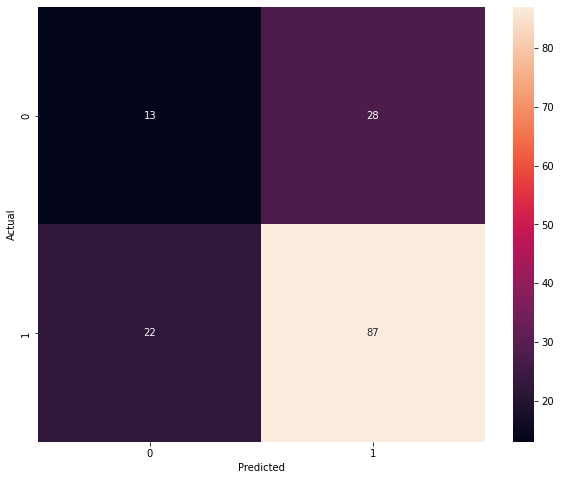

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
X_test

509    associate former employee flexible hours worki...
127    human resources assistant former employee good...
313    warehouse associate current employee great pla...
167    associate former employee working amazon small...
490    warehouse associate current employee honestly ...
                             ...                        
336    packer current employee amazon rate u acheive ...
457    picker/packer former employee disappointing bi...
13     n/a former employee na okay place work enjoy m...
50     amazon fulfillment associate current employee ...
284    prime shopper former employee flexible hours f...
Name: Reviews, Length: 150, dtype: object

In [ ]:
X_test[127]

'human resources assistant former employee good place work attending school nice place work make career it. enjoy time lear basic pc hr policies conducts, help corporate world'

In [ ]:
y_test[13]

1

In [ ]:
#from sklearn import feature_extraction

input_data = ["sortation associate current employee horrible managers pick reasons. threaten fire smallest things. power trip actually appreciating employees. effort connect engage employees. sad place work at."]

input_data_features = tf_vect.transform(input_data)

prediction = clf.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
  print("Positive Review")
else:
  print("Negative Review")

[0]
Negative Review


In [ ]:
import pickle
pickle.dump(tf_vect,open('tf_vect.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))